# Predict hydraulic failure
### based upon https://www.kaggle.com/juebrauer/predicting-pump-failure-with-a-mlp

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%bigquery dataset
select 
TimeStamp                      ,
Stable                         ,
Cooler_Condition               ,
Hydraulic_Accumulator          ,
Internal_Pump_Leakage          ,
Valve_Condition                ,
Cooling_Efficiency             ,
Cooling_Power                  ,
Efficiency_Factor              ,
Motor_Power                    ,
Pressure1                      ,
Pressure2                      ,
Pressure3                      ,
Pressure4                      ,
Pressure5                      ,
Pressure6                      ,
Temperature1                   ,
Temperature2                   ,
Temperature3                   ,
Temperature4                   ,
Vibration                      ,
Volume_Flow1                   ,
Volume_Flow2                   
from `osi-pi-gcp-accelerator.PI_Integrator_Data.Condition_Monitoring_Hydraulics_One_Second_Interpolation`
order by TimeStamp

In [3]:
dataset.dtypes

TimeStamp                datetime64[ns, UTC]
Stable                               float64
Cooler_Condition                     float64
Hydraulic_Accumulator                float64
Internal_Pump_Leakage                float64
Valve_Condition                      float64
Cooling_Efficiency                   float64
Cooling_Power                        float64
Efficiency_Factor                    float64
Motor_Power                          float64
Pressure1                            float64
Pressure2                            float64
Pressure3                            float64
Pressure4                            float64
Pressure5                            float64
Pressure6                            float64
Temperature1                         float64
Temperature2                         float64
Temperature3                         float64
Temperature4                         float64
Vibration                            float64
Volume_Flow1                         float64
Volume_Flo

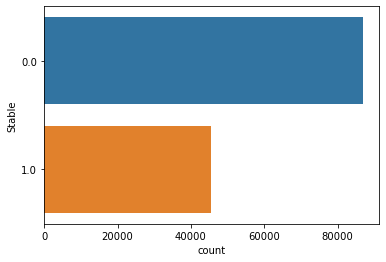

In [4]:
sns.countplot(y = dataset['Stable']);

In [5]:
dataset.isna().sum()

TimeStamp                0
Stable                   0
Cooler_Condition         0
Hydraulic_Accumulator    0
Internal_Pump_Leakage    0
Valve_Condition          0
Cooling_Efficiency       0
Cooling_Power            0
Efficiency_Factor        0
Motor_Power              0
Pressure1                0
Pressure2                0
Pressure3                0
Pressure4                0
Pressure5                0
Pressure6                0
Temperature1             0
Temperature2             0
Temperature3             0
Temperature4             0
Vibration                0
Volume_Flow1             0
Volume_Flow2             0
dtype: int64

In [6]:
dataset.head()

,TimeStamp,Stable,Cooler_Condition,Hydraulic_Accumulator,Internal_Pump_Leakage,Valve_Condition,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
0,2020-02-11 00:00:00+00:00,1.0,3.0,130.0,0.0,100.0,47.202,2.184,68.039,2411.6,151.47,125.500,2.305,0.0,9.936,9.818,35.570,40.961,38.320,30.363,0.604,8.990,10.179
1,2020-02-11 00:00:01+00:00,1.0,3.0,130.0,0.0,100.0,47.273,2.184,0.000,2936.6,191.46,0.430,0.000,0.0,9.974,9.846,35.492,40.949,38.332,30.375,0.605,0.001,10.176
2,2020-02-11 00:00:02+00:00,1.0,3.0,130.0,0.0,100.0,47.250,2.184,0.000,2656.2,179.09,0.133,0.000,0.0,9.984,9.865,35.469,40.965,38.320,30.367,0.611,0.005,10.163
3,2020-02-11 00:00:03+00:00,1.0,3.0,130.0,0.0,100.0,47.332,2.185,0.000,2949.4,191.43,0.000,0.000,0.0,9.947,9.823,35.422,40.922,38.324,30.367,0.603,0.000,10.167
4,2020-02-11 00:00:04+00:00,1.0,3.0,130.0,0.0,100.0,47.213,2.178,0.000,2945.8,191.36,0.000,0.000,0.0,9.964,9.847,35.414,40.879,38.332,30.379,0.608,0.000,10.167


In [7]:
len(dataset)
dataset.tail()

132301

,TimeStamp,Stable,Cooler_Condition,Hydraulic_Accumulator,Internal_Pump_Leakage,Valve_Condition,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
132296,2020-02-12 12:44:56+00:00,0.0,100.0,90.0,0.0,100.0,46.432,2.146,68.167,2415.6,151.84,125.50,2.352,10.207,9.962,9.846,35.437,40.895,38.184,30.391,0.528,7.858,10.196
132297,2020-02-12 12:44:57+00:00,0.0,100.0,90.0,0.0,100.0,46.384,2.144,68.258,2417.4,151.81,125.78,2.305,10.198,9.965,9.851,35.434,40.883,38.184,30.395,0.522,8.013,10.194
132298,2020-02-12 12:44:58+00:00,0.0,100.0,90.0,0.0,100.0,46.479,2.136,68.258,2417.6,151.81,125.79,2.406,10.241,10.014,9.896,35.434,40.879,38.184,30.402,0.522,7.710,10.167
132299,2020-02-12 12:44:59+00:00,0.0,100.0,90.0,0.0,100.0,46.621,2.148,68.117,2415.6,151.77,125.55,2.297,10.216,9.974,9.856,35.426,40.891,38.187,30.375,0.531,7.866,10.182
132300,2020-02-12 12:45:00+00:00,0.0,100.0,90.0,0.0,100.0,46.621,2.148,68.117,2417.0,151.70,125.77,2.250,10.212,9.964,9.854,35.426,40.891,38.187,30.375,0.531,7.774,10.176


In [8]:
# extra row care of interpolation, so remove it
dataset.drop([132300],inplace=True)

In [9]:
len(dataset)
dataset.tail(1)

132300

,TimeStamp,Stable,Cooler_Condition,Hydraulic_Accumulator,Internal_Pump_Leakage,Valve_Condition,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
132299,2020-02-12 12:44:59+00:00,0.0,100.0,90.0,0.0,100.0,46.621,2.148,68.117,2415.6,151.77,125.55,2.297,10.216,9.974,9.856,35.426,40.891,38.187,30.375,0.531,7.866,10.182


In [39]:
dataset.date_range()

AttributeError: 'DataFrame' object has no attribute 'timestamp'

In [10]:
sensordata = dataset.iloc[:,6:]

In [11]:
sensordata.head()

,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
0,47.202,2.184,68.039,2411.6,151.47,125.500,2.305,0.0,9.936,9.818,35.570,40.961,38.320,30.363,0.604,8.990,10.179
1,47.273,2.184,0.000,2936.6,191.46,0.430,0.000,0.0,9.974,9.846,35.492,40.949,38.332,30.375,0.605,0.001,10.176
2,47.250,2.184,0.000,2656.2,179.09,0.133,0.000,0.0,9.984,9.865,35.469,40.965,38.320,30.367,0.611,0.005,10.163
3,47.332,2.185,0.000,2949.4,191.43,0.000,0.000,0.0,9.947,9.823,35.422,40.922,38.324,30.367,0.603,0.000,10.167
4,47.213,2.178,0.000,2945.8,191.36,0.000,0.000,0.0,9.964,9.847,35.414,40.879,38.332,30.379,0.608,0.000,10.167


In [12]:
# scale data here

# create a MinMaxScaler with feature range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_sensor_data = scaler.fit_transform(sensordata)


In [13]:
scaled_sensor_data[0]

array([9.50370254e-01, 6.17010037e-01, 6.76332008e-01, 3.50302758e-01,
       3.04909561e-01, 7.56479807e-01, 4.11460193e-01, 0.00000000e+00,
       9.49530516e-01, 9.49445129e-01, 2.52336046e-02, 1.18310122e-02,
       8.17986351e-03, 3.51031154e-04, 5.86524479e-02, 5.53435115e-01,
       8.39904421e-01])

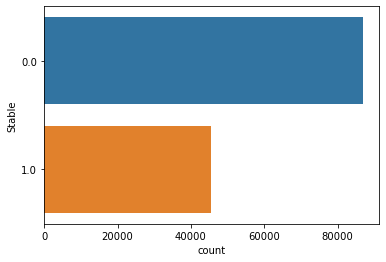

In [14]:
sns.countplot(y = dataset['Stable']);

In [15]:
# number of test performed
tests = 2205
nr_examples_to_prepare = tests
# build training set


In [16]:
training_pairs = []
debug = False
for example in range(0,tests):
    rnd_minute = np.random.randint(0,tests-1)  # get a random test number
    start_test_row = rnd_minute * 60  # locate the start of the test in the dataset 
    if debug:
        #print(start_test_row)
        #print(sensordata.iloc[start_test_row])
        #print(dataset.iloc[start_test_row])
        print(f"test status: {dataset.iloc[start_test_row,1]}")
    window = scaled_sensor_data[start_test_row:start_test_row+60]
    window_vector = window.flatten()
    training_pairs.append( (window_vector, dataset.iloc[start_test_row,1]) )

In [17]:
len(training_pairs)

2205

In [18]:
input_vec_len = training_pairs[0][0].shape[0]
output_vec_len = 1

D = np.zeros( (tests, input_vec_len+output_vec_len))
print("Shape of D is", D.shape)

# Fill data matrix D with input vec + output vec in each row
for nr in range(0,tests):
    (x,y) = training_pairs[nr]
    D[nr,0:input_vec_len] = x
    D[nr,input_vec_len]   = y

Shape of D is (2205, 1021)


In [19]:
nr_train_samples = int(nr_examples_to_prepare/2)
x_train = D[0:nr_train_samples, 0:input_vec_len]
y_train = D[0:nr_train_samples, input_vec_len]

In [20]:
x_train.shape
y_train.shape

(1102, 1020)

(1102,)

In [21]:
x_test = D[nr_train_samples:, 0:input_vec_len]
y_test = D[nr_train_samples:, input_vec_len]

In [22]:
!pip install tensorflow

In [23]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(input_vec_len,)) )
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               204200    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                8040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 212,281
Trainable params: 212,281
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train, epochs=3000)

Epoch 1/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.6842
Epoch 2/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.7895
Epoch 3/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.8158
Epoch 4/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.8212
Epoch 5/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.8303
Epoch 6/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.8294
Epoch 7/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.8475
Epoch 8/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.8512
Epoch 9/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.8539
Epoch 10/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.8648

In [26]:
type(history)

tensorflow.python.keras.callbacks.History

In [27]:
type(history.history)

dict

In [28]:
history.history["loss"][:20]

[0.26260268688201904,
 0.15267586708068848,
 0.13936395943164825,
 0.13674773275852203,
 0.1321985274553299,
 0.13449916243553162,
 0.12390556186437607,
 0.12159625440835953,
 0.11975362151861191,
 0.1185474544763565,
 0.11454019695520401,
 0.10694917291402817,
 0.10380350053310394,
 0.1094348132610321,
 0.09949634224176407,
 0.09931999444961548,
 0.11188893020153046,
 0.10440582036972046,
 0.09772639721632004,
 0.11848936975002289]

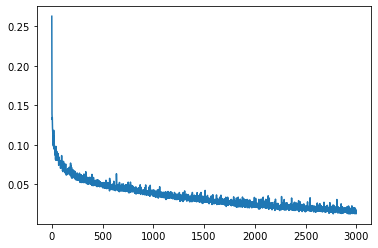

In [29]:
plt.plot(history.history["loss"])
plt.show();

In [30]:
preds = model.predict(x_test)

In [31]:
preds.shape

(1103, 1)

In [32]:
y_test.shape

(1103,)

In [33]:
preds = preds.flatten()

In [34]:
preds.shape

(1103,)

In [35]:
preds[:20]

array([-0.03150471,  1.0541688 ,  0.08622383,  1.0152309 , -0.00634934,
        0.02057518, -0.01354118, -0.13989653,  1.0452983 ,  1.0609406 ,
        0.03985851,  1.0121408 ,  0.02455725,  0.9697381 ,  0.06270091,
        0.03434934, -0.05951981,  0.9457825 ,  1.0475327 , -0.00556837],
      dtype=float32)

In [36]:
min(preds)
max(preds)

-0.24715717

1.2305828

In [37]:
type(x_test)

numpy.ndarray

In [38]:
preds = model.predict(x_test)